# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Charles Dometian
- **Email:** charles.dometian@gmail.com
- **ID Dicoding:** Charles Dometian

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi dari customers yang dimiliki?
- Tentukan kapan terakhir pelanggan melakukan transaksi, seberapa sering seroang pelanggan melakukan pembelian dalam beberapa bulan terakhir, serta berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir!

## Import Semua Packages/Library yang Digunakan

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tahap ini merupakan proses pengumpulan data untuk menjawab pertanyaan bisnis diatas. Ada 3 dataset yang saya gunakan pada E-commerce public dataset, yaitu customers_dataset, orders_dataset, dan order_payments_dataset ketiga file tersebut berformatkan CSV yang telah saya repositorikan ke github untuk memudahkan pemanggilan.

Agar ketiga file tersebut dapat terbaca, saya menggunakan library pandas dengan menggunakan function read_csv() karena ketiga file tersebut berformatkan CSV, kemudian mendefinisikannya ke sebuah variabel baru untuk menampung fungsi tersebut sehingga ketika variabel tersebut dipanggil dapat langsung memunculkan hasil pembacaan file dalam bentuk dataframe.

Tiap variabel yang didefinisikan saya ikuti dengan method head() untuk menampilkan 5 baris pertama pada tiap dataframe.

In [3]:
#Memuat tabel customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/CharlesD12/Analisis_data_E-Commerce_Public_Dataset/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#Memuat tabel orders_dataset
orders_dataset_df = pd.read_csv("https://raw.githubusercontent.com/CharlesD12/Analisis_data_E-Commerce_Public_Dataset/main/data/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
#Memuat tabel order_payments
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/CharlesD12/Analisis_data_E-Commerce_Public_Dataset/main/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

Tahap ini merupakan proses mengidentifikasi masalah yang terdapat dalam tiap data, seperti missing value, invalid value, duplicated value dll. Disini saya akan mengidentifikasi ketiga data yang akan saya gunakan, dimulai dari dataframe customers.

Pada data customers saya memeriksa apakah tipe data sudah sesuai dengan jenis nilai tiap kolom dengan mengunakan method info()

In [6]:
#Menilai customers
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB



*   Jika kita lihat jumlah data yang ada pada tiap column memiliki jumlah yang sama yaitu 99441 data sehingga kita bisa mengganggap bahwa tidak ada missing values pada data ini.

*   Kemudian jika kita perhatikan pada tipe data, sepertinya juga tidak terjadi kesalahan karena tiap tipe datanya didefinisikan dengan tepat. customer_id dan customer_unique_id didefinisikan sebagai tipe data objet dimana tipe data ini biasa digunakan untuk teks/string dalam pandas sehingga hal ini seharusnya sudah sesuai karena pada data yang ditampilkan sebelumnya customer_id dan customer_unique merubakan kombinasi alfabet dan numerik.

*   Untuk customer_zip_code_prefix juga sudah didefinisikan dengan tepat yaitu sebagai tipe data int64, dimana jika kita lihat sebelumnya nilai dari kolom ini memang hanya bernilai angka saja.

*   Dan yang terakhir customer city dan customer state juga sudah didefinisikan dengan tepat karena memang kedua nilai kolom ini hanya mengandung alfabet saja sehingga pendefinisian kedua variabel ini sebagai tipe data object juga sudah tepat.

In [7]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Pada kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat setiap kolom. Dapat kita lihat bahwa tidak ada nilai missing values pada tiap kolom yang ada. Hal ini juga memastikan asusmsi kita sebelumnya, bahwa memang tidak ada missing values pada data ini.

In [8]:
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

Jumlah duplikasi :  0


Pada kode di atas kita dapat melihat bahwa tidak terdapat data yang terduplikat, sehingga pada cleaning data nanti kita tidak perlu melakukan pembersihan duplikat terhadap data ini.

In [9]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Jika kita lihat pada ringkasa parameter statistik di atas, sepertinya tidak ada nilai yang aneh karena customer_zip_code_prefix hanya merepresentasikan alamat tempat tinggal bukan nilai yang benar-benar merepresentasikan angka seperti umur misalnya. Sehingga tidak ada yang perlu dibersihkan pada data ini.

In [10]:
#Menilai orders_dataset
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB



*   Jika kita lihat jumlah data yang ada pada tiap column memiliki jumlah yang berbeda, dapat diasumsikan bahwa didalam dataset orders ini terdapat missing values karena berdasarkan nilai yang ada di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date tidak memiliki nilai yang sama dengan kolom-kolom lainnya yaitu 99441.

*   Kemudian jika kita perhatikan pada tipe data, sepertinya juga terjadi kesalahan pada tipe data karena terdapat tipe data yang salah didefinisikan. order_purchase_timestamp, order_approved_at, order_delivered_carrier_date,order_delivered_customer_date, dan order_estimated_delivery_date harusnya didefinisikan dengan tipe data datetime bukan object karena isi data tersebut melibatkan tanggal bukan alfanumerik.

*   Untuk kolom sisanya, sudah tepat karena order_id, customer_id, dan order_status melibatkan alfanumerik dan alfabet sehingga pemilihan tipe data object sudah dianggap tepat.

In [11]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Pada kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat setiap kolom. Dapat kita lihat bahwa terdapat missing values sebanyak 160 pada kolom order_approved_at, 1783 pada kolom order_delivered_carrier_date, dan 2965 pada kolom order_delivered_customer_date. Data missing values ini nanti akan dibersihkan pada tahap data cleaning nanti.

In [12]:
print("Jumlah duplikasi : ", orders_dataset_df.duplicated().sum())

Jumlah duplikasi :  0


Pada kode di atas kita dapat melihat bahwa tidak terdapat data yang terduplikat, sehingga pada cleaning data nanti kita tidak perlu melakukan pembersihan duplikat terhadap data ini.

In [13]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Untuk ringkasan paramater orders_dataset nampaknya tidak ada keanehan karena data tersebut hanya mencerminkan kode dari pengorderan, customer, status order, dan tanggal terkait transaksi order sehingga tidak ada yang perlu dibersihkan pada data ini.

In [14]:
#Menilai Data order_payments
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB



*   Jika kita lihat jumlah data yang ada pada tiap column memiliki jumlah yang sama yaitu 103886 data sehingga kita bisa mengganggap bahwa tidak ada missing values pada data ini.

*   Kemudian jika kita perhatikan pada tipe data, sepertinya juga tidak terjadi kesalahan karena tiap tipe datanya didefinisikan dengan tepat. Kolom order_id dan payment_type didefinisikan sebagai tipe data object dimana tipe data ini digunakan untuk menampung data berupa teks (alfabet/alfanumerik) sesuai dengan nilai datanya yaitu alfanumerik.  

*   Untuk kolom payment_sequential juga didefinisikan dengan tepat karena nilai dari kolom tersebut hanya berupa angka sehingga pendefinisian dengan tipe data int64 sudah tepat karena tipe data ini hanya menampung jenis data numerik saja.

*   Dan yang terakhir payment_value didefinisikan dengan float64 karena tipe data ini menampung bilangan desimal sesuai dengan nilai dari datanya yang mengandung bilangan desimal.

In [15]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Pada kode di atas berfungsi untuk menampilkan informasi terkait jumlah missing values yang terdapat setiap kolom. Dapat kita lihat bahwa tidak ada nilai missing values pada tiap kolom yang ada. Hal ini juga memastikan asusmsi kita sebelumnya, bahwa memang tidak ada missing values pada data ini.

In [16]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


Pada kode di atas kita dapat melihat bahwa tidak terdapat data yang terduplikat, sehingga pada cleaning data nanti kita tidak perlu melakukan pembersihan duplikat terhadap data ini.

In [17]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Untuk ringkasan paramater orders_dataset nampaknya tidak ada yang perlu dibersihkan karena data tersebut tidak ada angka yang menunjukkan kejanggalan.

### Cleaning Data

Tahap ini merupakan proses untuk membersihkan data berdasarkan assessing data yang telah dilakukan sebelumnya agar hasil analisis data bisa memberikan hasil yang lebih tepat.

Pada data customers saya tidak melakukan cleaning data karena seluruh kolomnya telah didefinisikan dengan tipe data yang benar, jumlah seluruh kolomnya juga sama sehingga tidak ada missing values, serta tidak adanya duplikasi data.

In [18]:
#Mengubah tipe data dari object menjadi date pada orders_dataset
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])



*   Pada penilaian sebelumnya, pada order dataset terjadi kesalahan tipe data yang seharusnya bertipe datetime malah bertipekan object. Oleh karena itu disini, saya akan mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date menjadi datetime.
*   Untuk mengubahnya saya menggunakan function to_datetime() yang disediakan oleh library pandas.


In [19]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Dapat kita lihat bahwa kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date tipe datanya telah berubah menjadi datetime. Hal ini menandakan bahwa semua tahapan telah berjalan sesuai harapan.

In [20]:
#Membersihkan orders_dataset
orders_dataset_df[orders_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


*   Berdasarkan penilaian sebelumnya, diketahui bahwa
terdapat 160 missing value pada kolom order_approved_at, 1.783 missing value pada kolom order_delivered_carrier_date, dan 2.965 missing value pada kolom order_delivered_customer_date.
*   Data tersebut akan sangat disayangkan jika langsung dibuang karena jumlahnya yang begitu banyak dan dikhawatirkan juga nantinya akan mempengaruhi hasil analisis data. Oleh karena itu, kita perlu memperhatikan baik-baik teknik apa yang paling tepat untuk mengatasi missing value ini.




In [21]:
orders_dataset_df.order_approved_at.fillna(method='ffill', inplace=True)
orders_dataset_df.order_delivered_carrier_date.fillna(method='ffill', inplace=True)
orders_dataset_df.order_delivered_customer_date.fillna(method='ffill', inplace=True)

Karena data yang kosong merupakan tanggal, kita bisa menggunakan teknik interpolation karena teknik ini sangat cocok digunakan untuk mengatasi missing values pada data time series dan saya menggunakan method ffill (forward fill) karena nilai dari tanggal selanjutnya adalah nilai lanjutan dari tanggal yang sebelumnya sehingga saya rasa method ini yang paling sesuai.

In [22]:
orders_dataset_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Dapat kita lihat bahwa kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date menunjukkan angka nol yang berarti bahwa seluruh missing values telah berhasil diisikan dan menandakan bahwa semua tahapan telah berjalan lancar.

In [23]:
#Membersihkan order_payments
order_payments_df.groupby(by="payment_type").order_id.count()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

Berdasarkan hasil di atas terdapat 3 nilai yang tidak menyebutkan tipe pembayaran yang dilakukan. Untuk mengatasi hal ini kita perlu melakukan pembersihan data pada kolom not_defined namun kita juga harus menentukan metode apa yang paling tepat untuk melakukan cleaning pada data tersebut.

In [24]:
order_payments_df.drop(order_payments_df[order_payments_df.payment_type == 'not_defined'].index, inplace=True)

* Karena data yang kosong berjumlah sedikit maka metode yang paling tepat adalah untuk mendrop data dari kolom not_defined tersebut. Hal ini tentu tidak mempengaruhi hasil penilaian data secara signifikan karena jumlah datanya yang memang tidak terlalu banyak.
* Hal ini lebih baik daripada mengalokasikannya ke data credit_card yang kita juga belum tentu tahu apakah not_defined ini sudah pasti masuk ke kategori itu atau tidak.



In [25]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jika proses drop berjalan dengan lancar maka akan mengeluarkan output seperti di atas.

## Exploratory Data Analysis (EDA)

### Explore ...

Tahap ini merupakan proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data.

In [26]:
#Eksplorasi data customers

customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


* Berdasarkan rangkuman parameter statistik di atas,
kita dapat memperoleh informasi yaitu jumlah pelanggan sebanyak 99441 yang dapat kita lihat dari jumlah customer_id.
* Selain itu, kita juga dapat melihat customer kita paling banyak berada di daerah Sao Paulo. Hal ini dapat kita lihat dari top rangkuman parameter statistik tersebut atau biasa kita sebut dengan modus.
* Dan yang terakhir kita juga dapat melihat customer kita paling banyak berada di daerah SP. Hal ini dapat kita lihat dari top rangkuman parameter statistik tersebut atau biasa kita sebut dengan modul.




In [27]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64



*   Dapat kita lihat bahwa kota customer terbanyak berada di Sao Paulo, hal ini didukung dengan jumlah customernya yaitu 15540 customer.
*   Sementara untuk customer paling sedikit berada di kota Ibiara, Rio espera, Rio dos indios, Rio dos cedros, dan lagoao yang masing-masing hanya menunjukkan 1 customer saja.



In [28]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

* Dapat kita lihat bahwa negara customer terbanyak berada di SP, hal ini didukung dengan jumlah customernya yaitu 41746 customer.
* Untuk negara dengan cutomer paling sedikit berada di RR dengan jumlah 46 customer.


In [29]:
orders_dataset_df.groupby(by="order_status").customer_id.count().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

* Berdasarkan order_status, dapat kita lihat bahwa, banyak pesanan yang berhasil terkirim dengan baik ditunjukan dengan 96478 dengan status delivered.
* Untuk status approved merupakan status yang paling sedikit karena hanya menunjukkan 2 data saja (yang status approved).



In [30]:
order_payments_df.groupby(by="payment_type").order_id.count().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: order_id, dtype: int64

*   Berdasarkan metode pembayaran, dapat kita lihat bahwa customer lebih menyukai metode pembayarann credit_card, hal ini didukung dengan adanya 76795 transaksi pembayaran menggunakan credit_card.
*   Kita juga dapat melihat bahwa debit_card merupakan metode pembayaran yang kurang disukai customer, hal ini didukung dengan sedikitnya jumlah transaksi yaitu hanya 1529 transaksi. Tentu jumlah transaksi ini paling sedikit jika dibandingkan dengan metode transaksi lainnya.



In [31]:
# Pertama, gabungkan customers_df dan orders_dataset_df berdasarkan 'customer_id'
customers_orders_df = pd.merge(customers_df, orders_dataset_df, on='customer_id', how='left')

# Kemudian, gabungkan customers_orders_df (hasil dari penggabungan pertama) dengan order_payments_df berdasarkan 'order_id'
all_df = pd.merge(customers_orders_df, order_payments_df, on='order_id', how='left')

all_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


* Untuk mengeksplorasi lebih dalam, kita perlu untuk
menggabungkan data-data tersebut untuk melihat demografi pelanggan secara keseluruhan.
* Untuk penggabungan/merge kali ini saya menggunakan left join, dimana proses join ini akan mengambil semua nilai dari tabel kiri beserta nilai yang bersesuaian dari tabel kanan.

In [32]:
all_df[['customer_id', 'order_id', 'order_status', 'payment_type', 'payment_value']]

,customer_id,order_id,order_status,payment_type,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,delivered,credit_card,335.48
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25
...,...,...,...,...,...
103882,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,delivered,credit_card,88.78
103883,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,credit_card,129.06
103884,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,delivered,credit_card,56.04
103885,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,delivered,credit_card,711.07


Agar lebih fokus dalam melihat serta mencari jawaban dari data, saya mempersempit kolom yang ada dengan hanya menampilkan kolom customer_id, order_id, order_status, payment_type, dan payment_value saja.

## Visualization & Explanatory Analysis

Tahap ini merupakan proses analisis data yang bertujuan untuk membagikan beberapa insight yang menarik dari sebuah data dimana insight inilah yang akan digunakan untuk menjawab permasalahan bisnis yang dihadapi.

### Pertanyaan 1:

<ipython-input-41-481af1752215>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


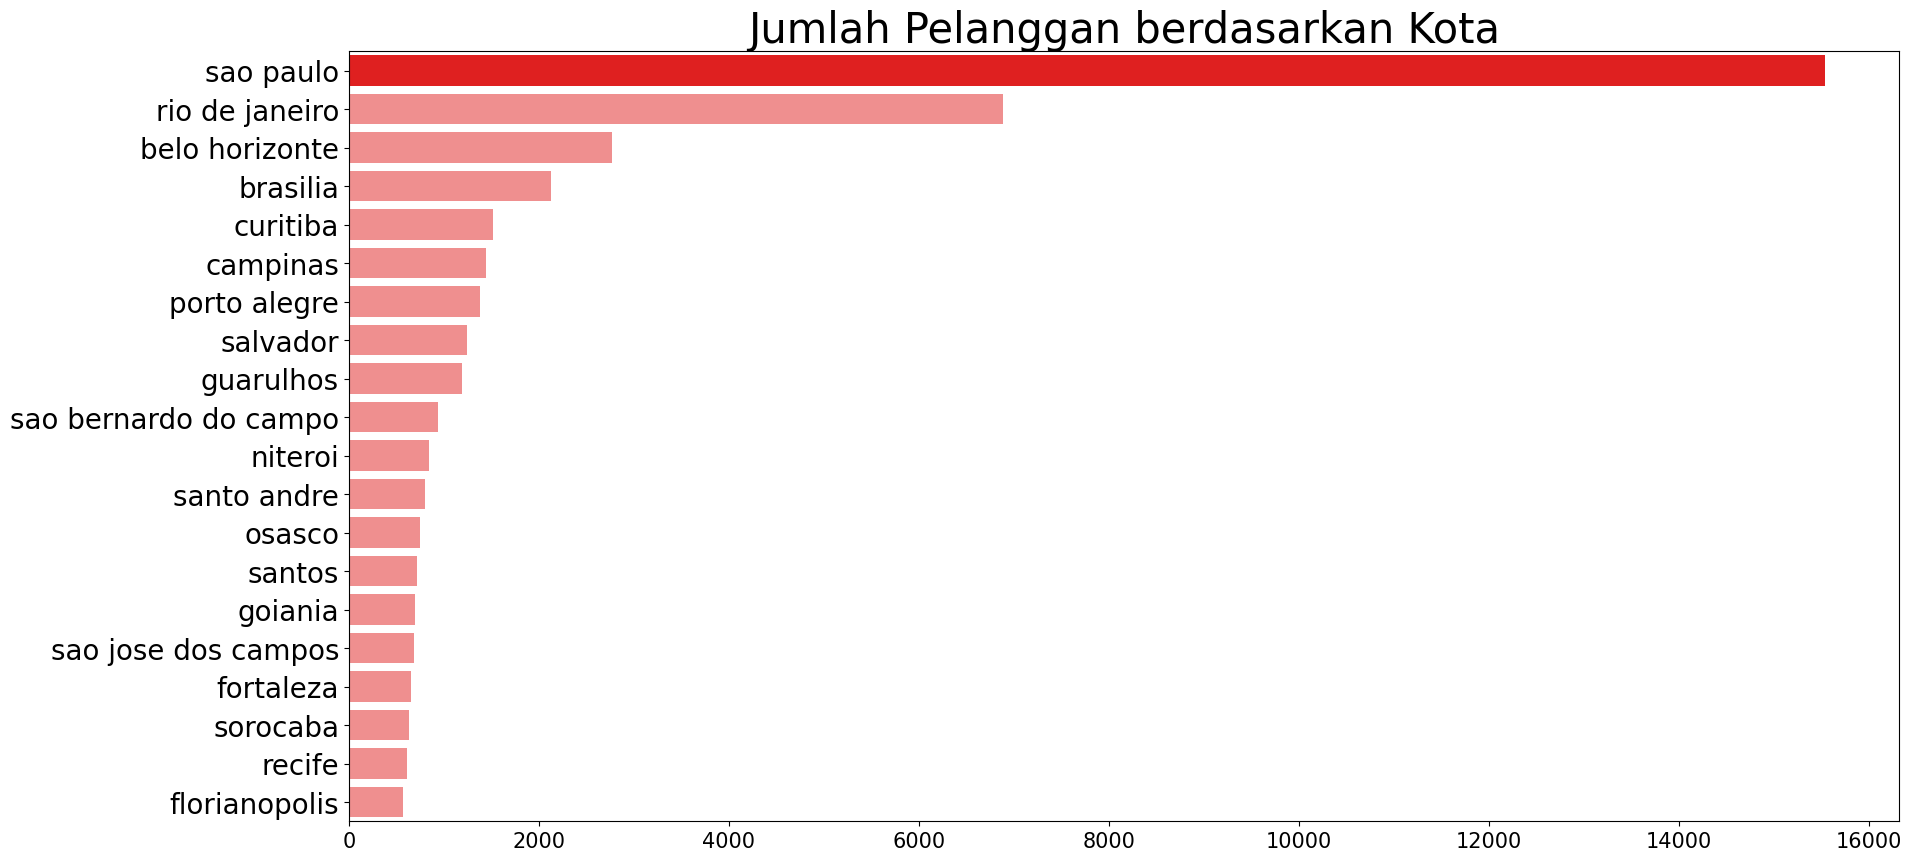

In [41]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

top_cities = bycity_df.sort_values(by="customer_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(20, 10))
colors = ["#FF0000"] + ["#FF7F7F"] * 19
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=top_cities,
    palette=colors,
    ax=ax
)
ax.set_title("Jumlah Pelanggan berdasarkan Kota", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
plt.show()


Berdasarkan bar chart (diagram batang) di atas, dapat kita lihat bahwa tiga besar pelanggan terbanyak berdasarkan kota adalah Sao Paolo, kemudian disusul oleh Rio de janeiro, dan belo horizonte.



<ipython-input-47-1c7c1cddf8f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


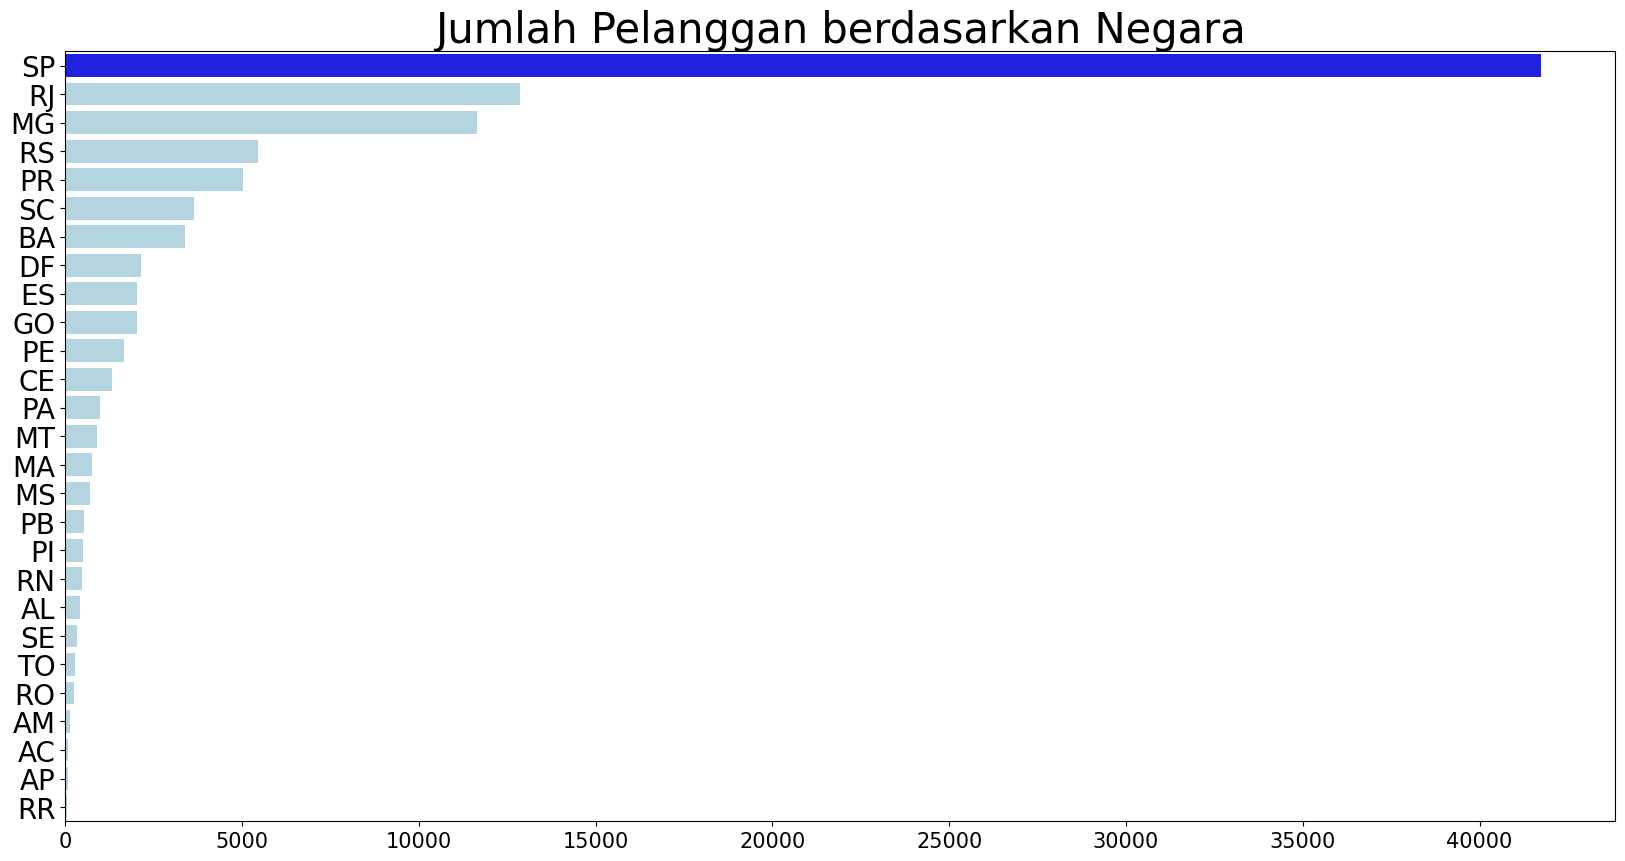

In [47]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

top_state = bystate_df.sort_values(by="customer_count", ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
colors = ["#0000FF"] + ["#ADD8E6"] * 26
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=top_state,
    palette=colors,
    ax=ax
)
ax.set_title("Jumlah Pelanggan berdasarkan Negara", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)
plt.show()


Berdasarkan bar chart (diagram batang) di atas, dapat kita lihat bahwa tiga besar pelanggan terbanyak berdasarkan negara adalah SP, kemudian disusul oleh RJ, dan MG.

### Pertanyaan 2:

In [48]:
# Menggunakan RFM Analysis
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
recent_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


<ipython-input-62-6def0f9924cb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=top5_recency, palette=colors, ax=ax[0])
<ipython-input-62-6def0f9924cb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-62-6def0f9924cb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=top5_frequency, palette=colors, ax=ax[1])
<ipython-input-62-6def0f9924cb>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
<ipython-input-62-6def0f9924cb>:26:

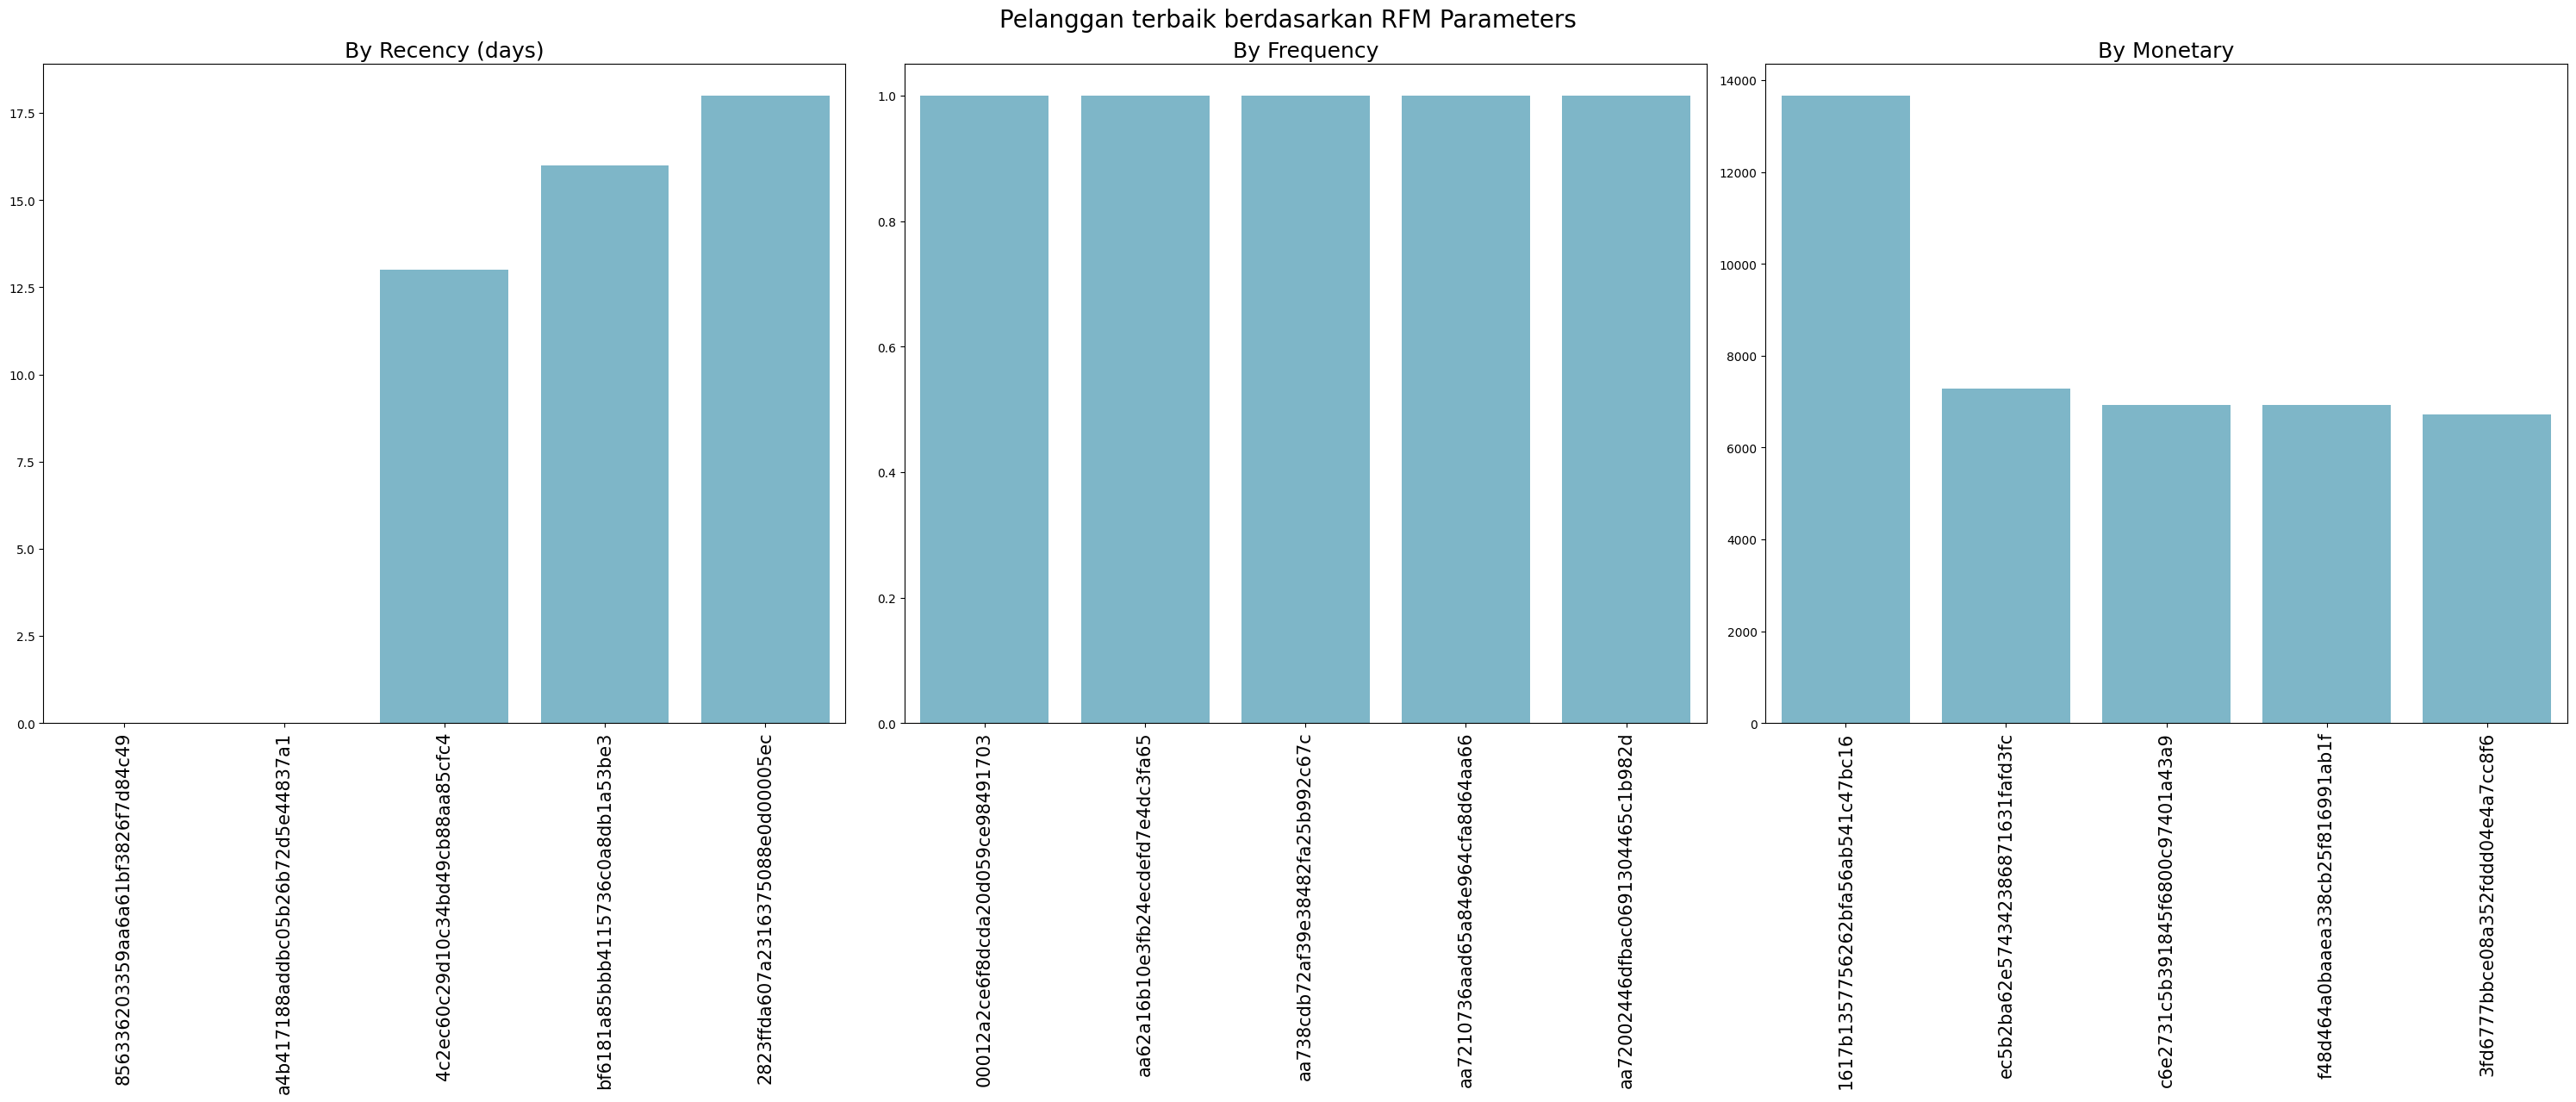

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10)) # Ukuran gambar diperbesar

# Buat daftar warna dengan biru untuk bar pertama dan biru cerah untuk sisa bar
colors = ["#72BCD4"] * 5

# Plot untuk Recency
top5_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
sns.barplot(y="recency", x="customer_id", data=top5_recency, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

# Plot untuk Frequency
top5_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(y="frequency", x="customer_id", data=top5_frequency, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

# Plot untuk Monetary
top5_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(y="monetary", x="customer_id", data=top5_monetary, palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.suptitle("Pelanggan terbaik berdasarkan RFM Parameters", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15) # Menambahkan ruang ekstra di bagian bawah untuk label sumbu x
plt.show()

* Untuk menjawab pertanyaan terakhir, saya menggunakan teknik analisis lanjutan yaitu RFM yang  merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.
* Customer terakhir kali melakukan transaksi sekitar 17 hari yang lalu dengan customer_id "2823ffda607a2316375088e0d00005ec"
* Rata-rata customer hanya melakukan transaksi sebanyak 1 kali. Salah satu contohnya adalah customer_id "1617b1357756262bfa56ab541c47bc16"
* Rata-rata customer menghabiskan danannya dikisaran 7300 hingga 7500 meskipun ada yang melebihi itu namun jumlahnya tidaklah banyak.




## Conclusion

- Demografi customer yang dimiliki berdasarkan tiga besar kota dengan customer paling banyak berasal dari Sao Paulo, Rio de Janeiro, dan belo horizonte. Sementara demografi customers yang dimiliki berdasarkan tiga besar negara dengan customer paling banyak berasal dari SP, RJ, dan MG. Hal ini didasarkan pada diagram batang "Distribusi pelanggan berdasarkan kota" dan "Distribusi pelanggan berdasarkan negara".
- Berdasarkan diagaram batang (barplot) di atas pelanggan terakhir kali melakukan transaksi sekitar 17 hari yang lalu dengan customer_id 2823ffda607a2316375088e0d00005ec.

  Untuk frekuensi pembelian yang dilakukan seorang pelanggan, rata-rata adalah 1 kali, hal ini ditunjukkan pada diagram batang (barplot), dari 5 data customer yang dimana masing-masing customer hanya melakukan pembelian sebanyak 1 kali.

  Untuk banyaknya dana yang dihabiskan dari ke 5 data tersebut, kebanyakan customer menghabiskan dikisaran 7300 - 7500, meskipun ada yang menyentuh sampai 1300an.

In [61]:
all_df.to_csv("all_data.csv", index=False)